<a href="https://colab.research.google.com/github/Cbmunns/Traffic_Sign_Recognition/blob/master/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Because our datafile is so large we need to use git lfs before cloning the file**

In [1]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 69 not upgraded.
Need to get 6,229 kB of archives.
After this operation, 14.5 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.13.3 [6,229 kB]
Fetched 6,229 kB in 0s (13.0 MB/s)
debconf: unable to init

**clone the repo to access the data files**

In [2]:
!git clone https://github.com/Cbmunns/Traffic_Sign_Recognition.git

Cloning into 'Traffic_Sign_Recognition'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 53 (delta 14), reused 34 (delta 7), pack-reused 0
Unpacking objects: 100% (53/53), done.


**Unzip the large file**


In [3]:
import zipfile

!unzip /content/Traffic_Sign_Recognition/sign_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

**Import important libraries for the file**

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os, sys
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

**Here we set up the lists to hold the data and their respective labels**

**Set the number of classes or different number of signs we wish to train on**

**Then set the path for or data set**

In [5]:
data = []
labels = []
classes = 43
os.chdir("/content")
cur_path = os.getcwd()
print(cur_path)

/content


**Then iterating through each folder, go over every image**

**Open the image**

**Resize each picture to 30 by 30 for consistency**

**Add it to the image list**

**And then add it's corresponding label**

In [6]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))
    print(path)
    images = os.listdir(path)
    #print(images)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


/content/train/0
/content/train/1
/content/train/2
/content/train/3
/content/train/4
/content/train/5
/content/train/6
/content/train/7
/content/train/8
/content/train/9
/content/train/10
/content/train/11
/content/train/12
/content/train/13
/content/train/14
/content/train/15
/content/train/16
/content/train/17
/content/train/18
/content/train/19
/content/train/20
/content/train/21
/content/train/22
/content/train/23
/content/train/24
/content/train/25
/content/train/26
/content/train/27
/content/train/28
/content/train/29
/content/train/30
/content/train/31
/content/train/32
/content/train/33
/content/train/34
/content/train/35
/content/train/36
/content/train/37
/content/train/38
/content/train/39
/content/train/40
/content/train/41
/content/train/42


**Convert the lists into numpy arrays**

In [7]:
data = np.array(data)
labels = np.array(labels)

**We then get the dimensions of the arrays**

**Then seperate into the test/train sets**

In [8]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


**Place a quick check on the dimensions of the new arrays**

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


**We then use one hot encoding to break the different labels into easily deciphered binary**

For ex.)  
**label**  
stop,  
10,  
20,  

Becomes.)  
**stop  10  20**  
1, 0, 0,  
0, 1, 0,  
0, 0, 1,  




In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

**This code is to identify and verify that a GPU is available and what it's label is**


In [11]:

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUS Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Num GPUS Available:  1
Found GPU at: /device:GPU:0


**Using GPU acceleration we build our model**



In [12]:
with tf.device('/gpu:0'): 
  #Building the model
  model = Sequential()
  # We establish our convolutional layers with filter size of 5X5
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
  # Max-pooling/down sample the output of this data  of size 2 x 2
  model.add(MaxPool2D(pool_size=(2, 2)))
  # Improve the reliability we use dropout to regularize the output and help prevent overfitting
  model.add(Dropout(rate=0.25))
  # We repeat! now with the filter set to 3 X 3
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  # Down sample
  model.add(MaxPool2D(pool_size=(2, 2)))
  # Regularize
  model.add(Dropout(rate=0.25))
  # Flatten the data to prepare for the Dense layer
  model.add(Flatten())
  # Run this through a standard Dense layer
  model.add(Dense(256, activation='relu'))
  # Regularize
  model.add(Dropout(rate=0.5))
  # Final output layer with all 43 classes represented
  model.add(Dense(43, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Fit and store the model with 15 epochs
  history = model.fit(X_train, y_train, batch_size=32, epochs= 15, validation_data=(X_test, y_test))
  

Epoch 1/15
981/981 [==============================] - 38s 5ms/step - loss: 3.2263 - accuracy: 0.3099 - val_loss: 0.4458 - val_accuracy: 0.8859
Epoch 2/15
981/981 [==============================] - 4s 4ms/step - loss: 0.6941 - accuracy: 0.7947 - val_loss: 0.1759 - val_accuracy: 0.9505
Epoch 3/15
981/981 [==============================] - 4s 4ms/step - loss: 0.4332 - accuracy: 0.8742 - val_loss: 0.2177 - val_accuracy: 0.9345
Epoch 4/15
981/981 [==============================] - 4s 4ms/step - loss: 0.3212 - accuracy: 0.9060 - val_loss: 0.1339 - val_accuracy: 0.9602
Epoch 5/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2978 - accuracy: 0.9142 - val_loss: 0.0912 - val_accuracy: 0.9753
Epoch 6/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2609 - accuracy: 0.9272 - val_loss: 0.1216 - val_accuracy: 0.9644
Epoch 7/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2446 - accuracy: 0.9312 - val_loss: 0.0740 - val_accuracy: 0.9819
Epoch

**Save the model for further testing and send it to the repo**

In [32]:
from keras.models import load_model
model: model.save('model.h5')

!git init
!git config --global user.email cbrockingtonm@gmail.com
!git config --global user.name Cbmunns
!git remote add origin https://github.com/Cbmunns/Traffic_Sign_Recognition.git

!git add model.h5
!git commit -m "adding saved model"
!git push origin master 

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
[master cf7f65f] adding saved model
 1 file changed, 0 insertions(+), 0 deletions(-)
fatal: could not read Username for 'https://github.com': No such device or address


**Using the history object we observe the accuracy of our model over time**

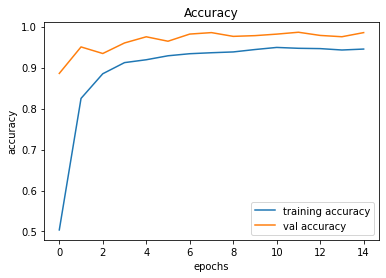

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Again using history we examine the loss of the model**

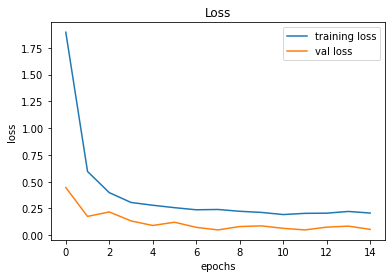

In [16]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Using a premade CSV we access shuffled photos that haven't been ran on the model to test true accuracy**

In [21]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)    
    image = image.resize((30,30))    
    data.append(np.array(image))

X_test=np.array(data)
pred = model.predict_classes(X_test)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Output the true accuracy of the model**

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9499604117181314


**Base code was used as a learning tool and was sourced from**  
https://data-flair.training/blogs/python-project-traffic-signs-recognition/

In [27]:
saved = load_model('model.h5')